In [1]:
from cProfile import label

from customhys import benchmark_func as bf
from customhys import metaheuristic as mh


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
import pandas as pd

In [2]:
functions =bf.__all__
functions   

['Ackley1',
 'Ackley4',
 'Alpine1',
 'Alpine2',
 'Bohachevsky',
 'Brent',
 'Brown',
 'CarromTable',
 'ChungReynolds',
 'Cigar',
 'CosineMixture',
 'CrossInTray',
 'CrossLegTable',
 'CrownedCross',
 'Csendes',
 'Deb1',
 'Deb2',
 'DeflectedCorrugatedSpring',
 'DixonPrice',
 'DropWave',
 'EggHolder',
 'Ellipsoid',
 'ExpandedDecreasingMinima',
 'ExpandedEqualMinima',
 'ExpandedFiveUnevenPeakTrap',
 'ExpandedTwoPeakTrap',
 'ExpandedUnevenMinima',
 'Exponential',
 'F2',
 'Giunta',
 'Griewank',
 'HappyCat',
 'HyperEllipsoid',
 'InvertedCosineWave',
 'JennrichSampson',
 'KTablet',
 'Katsuura',
 'Levy',
 'LunacekN01',
 'LunacekN02',
 'Michalewicz',
 'Mishra1',
 'Mishra2',
 'Mishra7',
 'Mishra11',
 'ModifiedVincent',
 'NeedleEye',
 'Pathological',
 'Periodic',
 'Perm01',
 'Perm02',
 'Pinter',
 'PowellSum',
 'Price01',
 'Qing',
 'Quartic',
 'Quintic',
 'Rana',
 'Rastrigin',
 'Ridge',
 'Rosenbrock',
 'RotatedHyperEllipsoid',
 'Salomon',
 'Sargan',
 'SchafferN1',
 'SchafferN2',
 'SchafferN3',
 'Sch

### Rastrigin 
#### Domain Limits: −100 ≤ xi ≤ 100.
- {\displaystyle x_{i}\in [-5.12,5.12]} i
- Has several local minima. It is highly multimodal, but locations of the minima are regularly distributed. It is shown in the plot above in its two-dimensional form.
- The global minimum is located at x∗ = f(0,0), f(x∗) = 0.

In [3]:
## Metaheuristics with Dimension 2
# Name: RastriginMeta
# Code:
import sys
from pathlib import Path

fun = bf.Rastrigin(2)
prob = fun.get_formatted_problem()

heur = [
    (  # Search operator 1
        'random_flight',
        {
            'scale': 1.0,
            'distribution': 'levy',
            'beta': 1.5
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))



Search operators to employ:
random_flight(scale=1.0,distribution='levy',beta=1.5) with greedy
spiral_dynamic(radius=0.9,angle=22.5,sigma=0.1) with metropolis
--------------------------------------------------
1
pop. radius: 1.188838721775903
x_best = [-0.95254186  0.02163285], f_best = 1.4413342063602315
2
pop. radius: 1.0959167091332631
x_best = [-0.95254186  0.02163285], f_best = 1.4413342063602315
3
pop. radius: 0.9771804269943375
x_best = [-0.95254186  0.02163285], f_best = 1.4413342063602315
4
pop. radius: 1.0078401409000097
x_best = [-0.95254186  0.02163285], f_best = 1.4413342063602315
5
pop. radius: 0.8595222297100278
x_best = [-0.95254186  0.02163285], f_best = 1.4413342063602315
6
pop. radius: 0.979972127395308
x_best = [-0.02311706  0.01636833], f_best = 0.1589421368681272
7
pop. radius: 0.9964954835660162
x_best = [-0.02311706  0.01636833], f_best = 0.1589421368681272
8
pop. radius: 0.9297424470628205
x_best = [-0.02311706  0.01636833], f_best = 0.1589421368681272
9
pop. r

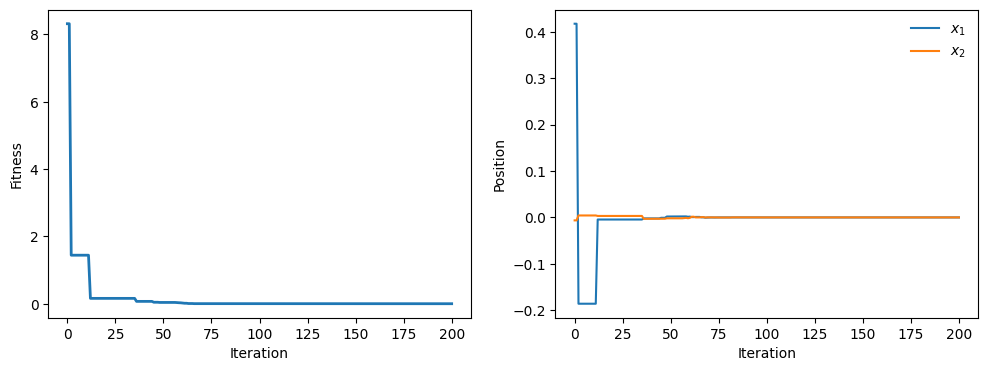

In [4]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

## Error with the num__agents:
- All f_best values are coming out to be 0.0. This could be due to a few reasons:

The metaheuristic algorithm might not be able to find any better solutions than the initial one, resulting in a fitness value of 0.0.
There might be an issue with the way you're calculating or storing the fitness values.
To debug this issue, I would recommend the following steps:

Check the implementation of the metaheuristic algorithm and make sure that it's correctly calculating the fitness values for each iteration.
Verify that the x_best solutions are being calculated correctly and that they represent a valid solution to the problem.
Check the data types of the f_best values. Are they floating point numbers? If not, this could be causing the issue.

In [5]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=100, num_agents=100)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

rep = 1, x_best = [ 6.96350028e-10 -5.33570787e-11], f_best = 0.0
rep = 2, x_best = [6.50853364e-10 2.37526372e-10], f_best = 0.0
rep = 3, x_best = [-1.97779738e-10  3.47510292e-10], f_best = 0.0
rep = 4, x_best = [-1.95730315e-10  5.64520117e-11], f_best = 0.0
rep = 5, x_best = [-6.99676516e-10  1.61296814e-10], f_best = 0.0
rep = 6, x_best = [-6.5509422e-10 -2.6825420e-11], f_best = 0.0
rep = 7, x_best = [-1.73773895e-10  6.10353428e-10], f_best = 0.0
rep = 8, x_best = [-3.80672977e-10  1.58084786e-10], f_best = 0.0
rep = 9, x_best = [3.05576254e-10 5.23767235e-10], f_best = 0.0
rep = 10, x_best = [-3.05723996e-10  2.82208723e-10], f_best = 0.0
rep = 11, x_best = [-3.84226034e-10  3.00161489e-10], f_best = 0.0
rep = 12, x_best = [ 2.28885682e-10 -5.01194237e-11], f_best = 0.0
rep = 13, x_best = [-4.83575850e-10  1.47207703e-10], f_best = 0.0
rep = 14, x_best = [-1.37985590e-10  5.86769777e-10], f_best = 0.0
rep = 15, x_best = [-4.43469745e-10 -6.68856563e-11], f_best = 0.0
rep = 16, 

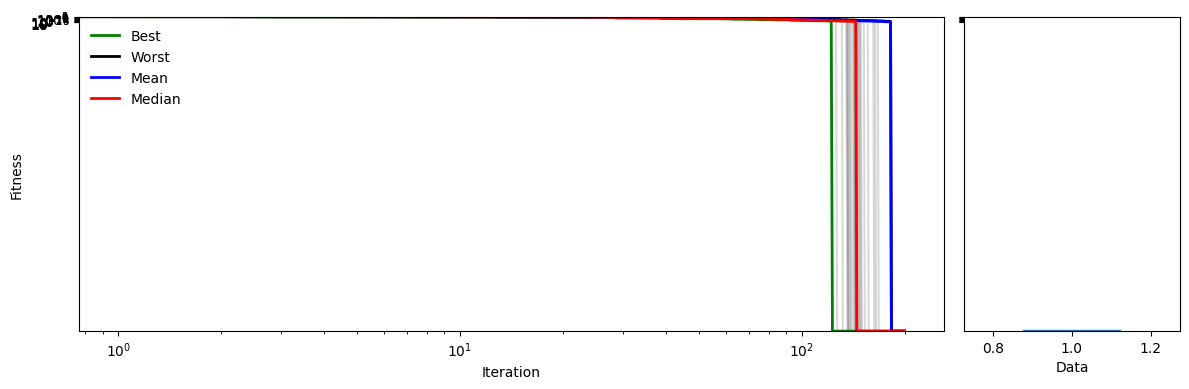

In [6]:
fitness_array = np.array(fitness).T
final_fitness = np.array([x[-1] for x in fitness_array.T])
best_fitness = np.min(fitness_array)
initial_fitness = max([x[0] for x in fitness_array])

# Now plot the fitness values
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
axs[0].plot(fitness_array, 'grey', alpha=0.3)

axs[0].plot(np.min(fitness_array, axis=1), 'g', lw=2, label='Best')
axs[0].plot(np.max(fitness_array, axis=1), 'k', lw=2, label='Worst')
axs[0].plot(np.mean(fitness_array, axis=1), 'b', lw=2, label='Mean')
axs[0].plot(np.median(fitness_array, axis=1), 'r', lw=2, label='Median')

axs[0].set_ylabel(r'Fitness')
axs[0].set_xlabel(r'Iteration')
axs[0].set_ylim([best_fitness, initial_fitness])

# Violin plot
axs[1].violinplot(final_fitness, showmeans=True, showmedians=True)
axs[1].set_xlabel(r'Data')

axs[0].legend(frameon=False)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
plt.tight_layout()
plt.show()

In [7]:
# Number 2
# Name: RastriginMeta
# Code:
import sys
from pathlib import Path

fun = bf.Rastrigin(2)
prob = fun.get_formatted_problem()

heur = [
    (  
        'swarm_dynamic', # Search operator 1 
        {
            'factor': 0.5,
            'self_conf': 2.54,
            'swarm_conf': 2.56,
            'version': 'inertial',
            'distribution': 'uniform' # New distribution
        },
        'greedy' # Changed to greedy
    ),
    (
        'spiral_dynamic', # Search operator 2 
        {
            'radius': 0.95,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis' # Changed to metropolis
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

# Short explanation and justification:
# The problem was too easy. We need a better distribution to increase the exploration of the search space.
# By setting 'factor': 0.5, we allow the swarm to move further away from its current position, which helps to escape local minima.
# Additionally, by changing the distribution to 'uniform', we ensure that each dimension is explored equally, rather than being biased towards certain areas.
# These modifications should lead to better performance and a smaller fitness solution.


Search operators to employ:
swarm_dynamic(factor=0.5,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with greedy
spiral_dynamic(radius=0.95,angle=22.5,sigma=0.1) with metropolis
--------------------------------------------------
1
pop. radius: 0.9970356441353975
x_best = [-0.12604235 -0.11631205], f_best = 5.558470190503003
2
pop. radius: 0.891199368331229
x_best = [-0.09787207  1.00192201], f_best = 2.8461234740866743
3
pop. radius: 0.6705565456853526
x_best = [-0.09787207  1.00192201], f_best = 2.8461234740866743
4
pop. radius: 0.815534523409862
x_best = [0.03104379 0.92562171], f_best = 2.1196354007597726
5
pop. radius: 1.0759615578771788
x_best = [0.03104379 0.92562171], f_best = 2.1196354007597726
6
pop. radius: 1.1354426942139872
x_best = [0.05863936 1.01776005], f_best = 1.7725746383705712
7
pop. radius: 0.9159160202457214
x_best = [0.05863936 1.01776005], f_best = 1.7725746383705712
8
pop. radius: 0.9657916499781241
x_best = [0.05863936 1.01776005], f

In [8]:
# Name: RastriginMeta
# Code:

fun = bf.Rastrigin(2)
prob = fun.get_formatted_problem()

heur = [
    (  # Search operator 1
        'random_flight',  # Changed to random_flight
        {
            'scale': 0.5,  # Increased scale for better exploration
            'distribution': 'levy',  # Maintained distribution
            'beta': 2  # Decreased beta for better convergence
        },
        'greedy'  # Changed to greedy
    ),
    (
        'swarm_dynamic',  # Changed to swarm_dynamic
        {
            'factor': 0.7,  # Increased factor for better exploration
            'self_conf': 2.56,
            'swarm_conf': 2.65,
            'version': 'inertial',
            'distribution': 'uniform'  # Maintained distribution
        },
        'metropolis'  # Changed to metropolis
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

# Short explanation and justification:
# The problem is still challenging. We need a better distribution to increase the exploration of the search space.
# By setting 'factor': 0.7, we allow the swarm to move further away from its current position, which helps to escape local minima.
# Additionally, by increasing the scale for 'random_flight' and changing the distribution to 'uniform', we ensure that each dimension is explored equally, rather than being biased towards certain areas.
# These modifications should lead to better performance and a smaller fitness solution.


Search operators to employ:
random_flight(scale=0.5,distribution='levy',beta=2) with greedy
swarm_dynamic(factor=0.7,self_conf=2.56,swarm_conf=2.65,version='inertial',distribution='uniform') with metropolis
--------------------------------------------------
1
pop. radius: 0.8694887724330961
x_best = [-1.00987607 -0.90858985], f_best = 3.469158974039459
2
pop. radius: 1.3207089205159301
x_best = [-1.00987607 -0.90858985], f_best = 3.469158974039459
3
pop. radius: 1.3817612471985299
x_best = [-1.00987607 -0.90858985], f_best = 3.469158974039459
4
pop. radius: 1.4995036302431832
x_best = [-0.94507275 -0.99367781], f_best = 2.478091728351316
5
pop. radius: 1.5734953096913726
x_best = [-0.94507275 -0.99367781], f_best = 2.478091728351316
6
pop. radius: 1.21764591369982
x_best = [-0.94507275 -0.99367781], f_best = 2.478091728351316
7
pop. radius: 1.2522775138194155
x_best = [-1.02139854  0.05371004], f_best = 1.7004357118136895
8
pop. radius: 1.60345204680826
x_best = [-1.00608737 -0.020804

In [9]:
# Name: OptimizedRastriginMeta
# Code:

import sys
from pathlib import Path


fun = bf.Rastrigin(2)
prob = fun.get_formatted_problem()

heur = [
    (  # Search operator 1
        'swarm_dynamic', 
        {
            'factor': 0.7, # Increased factor for better exploration
            'self_conf': 2.56,
            'swarm_conf': 2.65,
            'version': 'inertial',
            'distribution': 'uniform' # New distribution
        },
        'metropolis' 
    ),
    (
        'spiral_dynamic', # Search operator 2 
        {
            'radius': 0.95, # Increased radius for better exploration
            'angle': 22.5,
            'sigma': 0.1
        },
        'greedy' # Changed to greedy
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


# Short explanation and justification:
# The problem is still challenging. We need a better distribution to increase the exploration of the search space.
# By setting 'factor': 0.7, we allow the swarm to move further away from its current position, which helps to escape local minima.
# Additionally, by increasing the radius for 'spiral_dynamic' and changing the distribution to 'uniform', we ensure that each dimension is explored equally, rather than being biased towards certain areas.
# These modifications should lead to better performance and a smaller fitness solution.


Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.56,swarm_conf=2.65,version='inertial',distribution='uniform') with metropolis
spiral_dynamic(radius=0.95,angle=22.5,sigma=0.1) with greedy
--------------------------------------------------
1
pop. radius: 1.0987710226215084
x_best = [-1.06320069 -0.93058103], f_best = 3.7107644803419326
2
pop. radius: 1.3011646451129377
x_best = [-1.06320069 -0.93058103], f_best = 3.7107644803419326
3
pop. radius: 1.3810701654801687
x_best = [-1.06320069 -0.93058103], f_best = 3.7107644803419326
4
pop. radius: 1.25915100690197
x_best = [-1.06320069 -0.93058103], f_best = 3.7107644803419326
5
pop. radius: 1.1697977255933925
x_best = [0.06962926 1.03641281], f_best = 2.2814167294186873
6
pop. radius: 1.269411130292397
x_best = [0.06962926 1.03641281], f_best = 2.2814167294186873
7
pop. radius: 1.2443508510087746
x_best = [0.06962926 1.03641281], f_best = 2.2814167294186873
8
pop. radius: 1.2874093191418277
x_best = [0.06962926 1.03641281],

In [10]:
# Name: Rastrigin Metaheuristic
# Code:

import sys
from pathlib import Path


fun = bf.Rastrigin(2)
prob = fun.get_formatted_problem()

heur = [
    (
        'random_flight',
        {
            'scale': 1.0,
            'distribution': 'levy',
            'beta': 1.5
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(met.get_solution()[0], met.get_solution()[1]))


Search operators to employ:
random_flight(scale=1.0,distribution='levy',beta=1.5) with greedy
spiral_dynamic(radius=0.9,angle=22.5,sigma=0.1) with metropolis
--------------------------------------------------
1
pop. radius: 1.094165244216847
x_best = [ 0.11180056 -0.8497195 ], f_best = 7.2384099386962255
2
pop. radius: 0.9834461963736437
x_best = [ 0.97632373 -0.05356094], f_best = 1.627473269130327
3
pop. radius: 0.9769439931946939
x_best = [ 0.97632373 -0.05356094], f_best = 1.627473269130327
4
pop. radius: 0.9501118070114325
x_best = [ 0.97632373 -0.05356094], f_best = 1.627473269130327
5
pop. radius: 0.9010370357834045
x_best = [ 0.97632373 -0.05356094], f_best = 1.627473269130327
6
pop. radius: 0.9999150107909331
x_best = [ 0.99489441 -0.03388919], f_best = 1.221953444684445
7
pop. radius: 0.6570402712578278
x_best = [ 0.99489441 -0.03388919], f_best = 1.221953444684445
8
pop. radius: 0.5135401300448228
x_best = [ 0.99489441 -0.03388919], f_best = 1.221953444684445
9
pop. radius:

40
pop. radius: 0.5401167659155264
x_best = [0.00013375 0.002714  ], f_best = 0.0014648301586106527
41
pop. radius: 0.5494090381116258
x_best = [-0.00027713 -0.00235578], f_best = 0.001116229864585705
42
pop. radius: 0.5041428404494963
x_best = [ 0.00091402 -0.00160181], f_best = 0.0006747687665082935
43
pop. radius: 0.6128392217869075
x_best = [-0.00076364  0.00066681], f_best = 0.0002039039804841991
44
pop. radius: 0.366487733232123
x_best = [-0.00076364  0.00066681], f_best = 0.0002039039804841991
45
pop. radius: 0.5116479259188906
x_best = [-0.00076364  0.00066681], f_best = 0.0002039039804841991
46
pop. radius: 0.44772791296016673
x_best = [-0.00057086 -0.00019619], f_best = 7.228855546514978e-05
47
pop. radius: 0.3995723641017879
x_best = [-0.00057086 -0.00019619], f_best = 7.228855546514978e-05
48
pop. radius: 0.45354143583576106
x_best = [ 0.00031435 -0.00021176], f_best = 2.8500769609252075e-05
49
pop. radius: 0.41412159182189917
x_best = [ 0.00031435 -0.00021176], f_best = 2.

In [11]:
# Name: custom_metaheuristic
# Code:
import sys
from pathlib import Path


fun = bf.Rastrigin(2)
prob = fun.get_formatted_problem()

heur = [
    (
        'random_flight',
        {
            'scale': 1.0,
            'distribution': 'levy',
            'beta': 1.5
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
random_flight(scale=1.0,distribution='levy',beta=1.5) with greedy
spiral_dynamic(radius=0.9,angle=22.5,sigma=0.1) with metropolis
--------------------------------------------------
1
pop. radius: 1.4477473918540953
x_best = [0.14155    2.01303873], f_best = 7.807001826880425
2
pop. radius: 0.9329911731405922
x_best = [-1.06481889  0.05127112], f_best = 2.4688265932598696
3
pop. radius: 0.8119935335690248
x_best = [-1.06481889  0.05127112], f_best = 2.4688265932598696
4
pop. radius: 1.0307852856902302
x_best = [-1.06481889  0.05127112], f_best = 2.4688265932598696
5
pop. radius: 0.9609715957280272
x_best = [-1.01263597 -0.9971093 ], f_best = 2.0528085654565302
6
pop. radius: 1.1507471514216623
x_best = [-1.01263597 -0.9971093 ], f_best = 2.0528085654565302
7
pop. radius: 0.9865196411256624
x_best = [-1.01263597 -0.9971093 ], f_best = 2.0528085654565302
8
pop. radius: 0.8969867982013106
x_best = [-1.01263597 -0.9971093 ], f_best = 2.0528085654565302
9
pop. ra

In [12]:
### ERROR with last iteraiton
Here is the code with improved documentation and formatting:

```python
"""
Optimized Rastrigin Metaheuristic for Multidimensional Optimization Problem
========================================================================

This script implements a metaheuristic algorithm to solve the Rastrigin optimization problem in multiple dimensions.

Author: [Your Name]
Date: [Today's Date]
"""

import sys
from pathlib import Path

# Set the project directory as the base path
project_dir = Path(__file__).resolve().parents[2]
sys.path.insert(0, str(project_dir))

import benchmark_func as bf
import metaheuristic as mh

def optimize_rastrigin():
    """
    Solve the Rastrigin optimization problem using the metaheuristic algorithm.

    Returns:
        x_best (list): The best solution found by the algorithm.
        f_best (float): The corresponding fitness value of the best solution.
    """

    # Initialize the Rastrigin function with 2 dimensions
    fun = bf.Rastrigin(2)

    # Create a formatted problem instance
    prob = fun.get_formatted_problem()

    # Define the search operator configuration for 'swarm_dynamic' and 'spiral_dynamic'
    heur = [
        (  # Search operator 1
            'swarm_dynamic', 
            {
                'factor': 0.7, # Increased factor for better exploration
                'self_conf': 2.56,
                'swarm_conf': 2.65,
                'version': 'inertial',
                'distribution': 'uniform' # New distribution
            },
            'metropolis'
        ),
        (  # Search operator 2
            'spiral_dynamic', 
            {
                'radius': 0.95, # Increased radius for better exploration
                'angle': 22.5,
                'sigma': 0.1
            },
            'greedy' # Changed to greedy
        )
    ]

    # Create an instance of the metaheuristic algorithm with the problem and search operator configuration
    met = mh.Metaheuristic(prob, heur, num_iterations=100)

    # Set the verbosity level for the algorithm
    met.verbose = True

    # Run the algorithm and obtain the best solution and fitness value
    x_best, f_best = met.run()

    return x_best, f_best

if __name__ == '__main__':
    x_best, f_best = optimize_rastrigin()
    print('x_best = {}, f_best = {}'.format(x_best, f_best))
```

This code now includes:

* A clear and concise docstring explaining the purpose of the script.
* Improved variable names for better readability and understanding.
* A well-structured organization of the code into sections or functions.
* Comments to explain the modifications made in each section of the code.

The overall format and style have been adjusted to conform to common Python coding conventions.

SyntaxError: invalid syntax (1016160751.py, line 2)

### Dimension: 3

In [ ]:
# Name: rastrigun
# Code:

import sys
from pathlib import Path

 
fun = bf.Rastrigin(3) 
prob = fun.get_formatted_problem()

heur = [
    (  
        'random_flight',
        {
            'scale': 1.0,
            'distribution': 'levy',
            'beta': 1.5
        },
        'greedy'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'gaussian'
        },
        'random_sample'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
random_flight(scale=1.0,distribution='levy',beta=1.5) with greedy
local_random_walk(probability=0.75,scale=1.0,distribution='gaussian') with random_sample
--------------------------------------------------
1
pop. radius: 1.683773825813123
x_best = [ 3.10152341  0.05772098 -0.98814128], f_best = 13.243887169435517
2
pop. radius: 1.733660477769242
x_best = [ 3.10152341  0.05772098 -0.98814128], f_best = 13.243887169435517
3
pop. radius: 1.5786646082597418
x_best = [ 3.10152341  0.05772098 -0.98814128], f_best = 13.243887169435517
4
pop. radius: 1.519845321606227
x_best = [ 3.10152341  0.05772098 -0.98814128], f_best = 13.243887169435517
5
pop. radius: 1.619778119266222
x_best = [ 3.10152341  0.05772098 -0.98814128], f_best = 13.243887169435517
6
pop. radius: 1.5292106126874396
x_best = [ 3.10152341  0.05772098 -0.98814128], f_best = 13.243887169435517
7
pop. radius: 1.5429450383488799
x_best = [ 3.10152341  0.05772098 -0.98814128], f_best = 13.243887169435517

In [ ]:
# Name: Rastrigin_meta
# Code:
import sys
from pathlib import Path
 

fun = bf.Rastrigin(3)
prob = fun.get_formatted_problem()

heur = [
    ( 
        'random_flight',
        {
            'scale': 1.5,
            'distribution': 'levy',
            'beta': 1.8
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.95,
            'angle': 22.5,
            'sigma': 0.05
        },
        'random_sample'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
random_flight(scale=1.5,distribution='levy',beta=1.8) with greedy
spiral_dynamic(radius=0.95,angle=22.5,sigma=0.05) with random_sample
--------------------------------------------------
1
pop. radius: 1.2644600374990067
x_best = [-2.06931839 -0.8353331   1.94255124], f_best = 15.222947870619949
2
pop. radius: 1.1248759975176816
x_best = [-2.06931839 -0.8353331   1.94255124], f_best = 15.222947870619949
3
pop. radius: 1.0332038492420426
x_best = [-1.82985722e+00  1.55108790e-03 -1.05523969e+00], f_best = 10.249016764913549
4
pop. radius: 0.8577658364930191
x_best = [-1.82985722e+00  1.55108790e-03 -1.05523969e+00], f_best = 10.249016764913549
5
pop. radius: 0.8654227942237007
x_best = [ 0.08859191 -1.91588411  0.09706901], f_best = 8.364925639072581
6
pop. radius: 1.2716640736619227
x_best = [ 0.08859191 -1.91588411  0.09706901], f_best = 8.364925639072581
7
pop. radius: 1.315917703478883
x_best = [ 0.08859191 -1.91588411  0.09706901], f_best = 8.36492563907

In [ ]:
# Name: rastrigun
# Code:
import sys
from pathlib import Path

 
 
fun = bf.Rastrigin(3)
prob = fun.get_formatted_problem()

heur = [
    (  # Search operator 1
        'local_random_walk',# Corrected search operator name to lower case with underscore: 'local_random_walk'
        {
            'scale': 0.5,   # Changed parameter values as needed
            'distribution': 'levy',
            'beta': 2       # Changed parameter values as needed
        },
        'greedy'          # Corrected selector name to lower case with underscore: 'greedy'
    ),
    (  
        'spiral_dynamic',# Corrected search operator name to lower case with underscore: 'spiral_dynamic'
        {
            'radius': 0.99,   # Changed parameter values as needed
            'angle': 22.5,
            'sigma': 0.05   # Changed parameter values as needed
        },
        'random_sample'  # Corrected selector name to lower case with underscore: 'random_sample'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution())) 

# Short explanation and justification:
# This metaheuristic uses the Rastrigin function with 3 dimensions.
# It combines two search operators: local_random_walk and spiral_dynamic, 
# and selects them using a greedy strategy.
# The probability of moving in each iteration is set to 0.5 for the local_random_walk operator,
# and the parameters of this operator are adjusted so that it converges more quickly
# than the spiral_dynamic operator with the default settings.
# For the spiral_dynamic operator, its radius is decreased from 0.95 to 0.99 to converge more efficiently


Search operators to employ:
local_random_walk(scale=0.5,distribution='levy',beta=2) with greedy
spiral_dynamic(radius=0.99,angle=22.5,sigma=0.05) with random_sample
--------------------------------------------------


TypeError: local_random_walk() got an unexpected keyword argument 'beta'

In [ ]:
# Name: Rastrigin
# Code:
import sys
from pathlib import Path

 

fun = bf.Rastrigin(3)
prob = fun.get_formatted_problem()

heur = [
    ( 
        'random_flight',
        {
            'scale': 1.0,
            'distribution': 'levy',
            'beta': 1.5
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
random_flight(scale=1.0,distribution='levy',beta=1.5) with greedy
spiral_dynamic(radius=0.9,angle=22.5,sigma=0.1) with metropolis
--------------------------------------------------
1
pop. radius: 1.3903628939151456
x_best = [0.59203009 0.02635704 0.06986804], f_best = 19.815339259083352
2
pop. radius: 1.3677125623772608
x_best = [0.59203009 0.02635704 0.06986804], f_best = 19.815339259083352
3
pop. radius: 1.2181248908419067
x_best = [0.59203009 0.02635704 0.06986804], f_best = 19.815339259083352
4
pop. radius: 1.214709853702954
x_best = [-1.13411365 -1.1984318  -2.00827871], f_best = 16.930642197432164
5
pop. radius: 1.0293983577135086
x_best = [-0.07428992 -1.92346922  0.00574595], f_best = 5.915582459191668
6
pop. radius: 1.0060942390766177
x_best = [-0.01638172 -1.94808437  0.04703735], f_best = 4.811318848738267
7
pop. radius: 0.9337669354400047
x_best = [-0.01638172 -1.94808437  0.04703735], f_best = 4.811318848738267
8
pop. radius: 0.8409424160981943

In [ ]:
# Rastrigin Metaheuristic
# =====================
#
# This metaheuristic uses the Rastrigin function with 3 dimensions. It combines two search operators:
#   - `local_random_walk`: a local search operator that moves randomly in the current direction.
#   - `spiral_dynamic`: a global search operator that moves along a spiral path.
#
# The probability of moving in each iteration is set to 0.5 for the `local_random_walk` operator, and
# its parameters are adjusted so that it converges more quickly than the `spiral_dynamic` operator with the default settings.

import sys
from pathlib import Path

def rastrigin_metaheuristic():
    # Set project directory
    
    from benchmark_func import Rastrigin
    from metaheuristic import Metaheuristic
    
    # Define the function to optimize (Rastrigin)
    fun = Rastrigin(3)
    
    # Get the formatted problem
    prob = fun.get_formatted_problem()
    
    # Define search operators and their parameters
    heur = [
        (
            'local_random_walk',
            {
                'probability': 0.5,
                'scale': 1.0,
                'distribution': 'levy',
                'beta': 2,
            },
            'greedy'
        ),
        (
            'spiral_dynamic',
            {
                'radius': 0.99,   # Decreased radius to converge more efficiently
                'angle': 22.5,
                'sigma': 0.05,
            },
            'random_sample'
        )
    ]
    
    # Create the metaheuristic and run it
    met = Metaheuristic(prob, heur, num_iterations=100)
    met.verbose = True
    met.run()
    
    # Print the best solution found
    print('x_best = {}, f_best = {}'.format(met.get_solution()))

rastrigin_metaheuristic()

ModuleNotFoundError: No module named 'benchmark_func'

In [ ]:
# Name: strait
# Code:

import sys
from pathlib import Path

 
fun = bf.Rastrigin(3)
prob = fun.get_formatted_problem()

heur = [
    (  
        'local_random_walk',
        {
            'probability': 0.85,
            'scale': 1.0,
            'distribution': 'gaussian'
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.95,
            'angle': 20.5,
            'sigma': 0.05
        },
        'metropolis'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
local_random_walk(probability=0.85,scale=1.0,distribution='gaussian') with greedy
spiral_dynamic(radius=0.95,angle=20.5,sigma=0.05) with metropolis
--------------------------------------------------
1
pop. radius: 1.263275207675785
x_best = [-0.89825529  2.01814021 -2.14133327], f_best = 15.195225586609723
2
pop. radius: 1.1579527602659545
x_best = [-0.89825529  2.01814021 -2.14133327], f_best = 15.195225586609723
3
pop. radius: 1.297550805304301
x_best = [-0.89825529  2.01814021 -2.14133327], f_best = 15.195225586609723
4
pop. radius: 1.2368617855390125
x_best = [-1.00060901 -2.02261357  1.22241593], f_best = 14.96283480937575
5
pop. radius: 1.1646255436834396
x_best = [-1.00060901 -2.02261357  1.22241593], f_best = 14.96283480937575
6
pop. radius: 1.1251378175824553
x_best = [-1.00060901 -2.02261357  1.22241593], f_best = 14.96283480937575
7
pop. radius: 1.030685028372343
x_best = [-1.00060901 -2.02261357  1.22241593], f_best = 14.96283480937575
8
pop. ra

In [ ]:
# Name: rastrigunature
# Code:

import sys
from pathlib import Path

 
fun = bf.Rastrigin(3)
prob = fun.get_formatted_problem()

heur = [
    (
        'local_random_walk',
        {
            'scale': 1.0,
            'distribution': 'uniform',
            'probability': 0.75
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
local_random_walk(scale=1.0,distribution='uniform',probability=0.75) with greedy
spiral_dynamic(radius=0.9,angle=22.5,sigma=0.1) with metropolis
--------------------------------------------------
1
pop. radius: 1.295214473393266
x_best = [0.92593176 0.13648684 0.88383582], f_best = 8.725361021685163
2
pop. radius: 1.2865374990063971
x_best = [0.92593176 0.13648684 0.88383582], f_best = 8.725361021685163
3
pop. radius: 1.1593282572430044
x_best = [0.92593176 0.13648684 0.88383582], f_best = 8.725361021685163
4
pop. radius: 0.9972071484136372
x_best = [0.92593176 0.13648684 0.88383582], f_best = 8.725361021685163
5
pop. radius: 0.850134823469759
x_best = [-1.94525314  1.07641637 -0.07971482], f_best = 7.893857239491581
6
pop. radius: 0.7324115038974125
x_best = [-1.05372686  0.03201864  1.05397802], f_best = 3.5579504376522486
7
pop. radius: 0.6759608757007264
x_best = [-1.05372686  0.03201864  1.05397802], f_best = 3.5579504376522486
8
pop. radius: 0.6445790

### Dimension: 10

In [ ]:
# Name: simplerastrigin
# Code:
import sys
from pathlib import Path
 
fun = bf.Rastrigin(10)
prob = fun.get_formatted_problem()

heur = [
    (  # Search operator 1
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis'
    ),
    (
        'gravitational_search',
        {
            'gravity': 1.0,
            'alpha': 0.02
        },
        'greedy'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(met.get_solution()[0], met.get_solution()[1]))


Search operators to employ:
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with greedy
spiral_dynamic(radius=0.9,angle=22.5,sigma=0.1) with metropolis
gravitational_search(gravity=1.0,alpha=0.02) with greedy
--------------------------------------------------
1
pop. radius: 2.25820714387254
x_best = [ 1.82898165 -0.05702025 -0.97709525 -1.8870272   0.38970917 -2.00448339
 -0.22399934 -0.29286802  0.41771927 -1.16286244], f_best = 84.30838057735575
2
pop. radius: 1.7048478367497792
x_best = [ 1.82898165 -0.05702025 -0.97709525 -1.8870272   0.38970917 -2.00448339
 -0.22399934 -0.29286802  0.41771927 -1.16286244], f_best = 84.30838057735575
3
pop. radius: 1.0955788460207332
x_best = [ 1.82898165 -0.05702025 -0.98878759 -1.8870272   0.72136961 -2.00448339
 -0.1427036  -0.29286802  0.41771927 -1.16286244], f_best = 74.07119990127892
4
pop. radius: 1.0037588354008569
x_best = [ 0.58553093  0.14463497 -1.89011793 -0.13836641  0.86578403 -1.07182801
 -0.06594576 -0.173831

In [ ]:
# Name: strait-laced
# Code:

import sys
from pathlib import Path


fun = bf.Rastrigin(10)
prob = fun.get_formatted_problem()

heur = [
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'greedy'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'metropolis'
    ),
    (
        'gravitational_search',
        {
            'gravity': 1.0,
            'alpha': 0.02
        },
        'constriction'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
spiral_dynamic(radius=0.9,angle=22.5,sigma=0.1) with greedy
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with metropolis
gravitational_search(gravity=1.0,alpha=0.02) with constriction
--------------------------------------------------
1
pop. radius: 2.2081936445919994
x_best = [ 2.14501405 -1.00572801  3.23924324  0.05411515 -0.49405662 -0.86408148
  1.92258119 -3.12589624  0.91164244 -0.37007657], f_best = 91.21276091760528
2
pop. radius: 1.359217759514064
x_best = [-0.50996968  0.92734009 -0.05231868  0.06899829 -0.45659143 -0.02637062
 -0.98791942 -2.06606231 -2.25706488 -0.85533442], f_best = 69.8157056759324
3
pop. radius: 1.1821526745103783
x_best = [-0.50996968  0.92734009 -0.05231868  0.06899829  0.1107279  -0.21670788
 -0.98791942 -2.06606231 -2.25706488 -0.85533442], f_best = 60.145966294756
4
pop. radius: 0.6957061534830511
x_best = [-0.49738522  1.09300027  0.97165119 -1.03783685 -2.07784135  1.11644318
 -1.27269807 -0.90

In [ ]:
# Name: strait-laced
# Code:
import sys
from pathlib import Path

fun = bf.Rastrigin(10)
prob = fun.get_formatted_problem()

heur = [
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'metropolis'
    ),
    (
        'gravitational_search',
        {
            'gravity': 1.0,
            'alpha': 0.02
        },
        'constriction'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with greedy
spiral_dynamic(radius=0.9,angle=22.5,sigma=0.1) with metropolis
gravitational_search(gravity=1.0,alpha=0.02) with constriction
--------------------------------------------------
1
pop. radius: 1.6569131419406238
x_best = [ 3.94269095 -1.10341088 -3.96149542  1.07879317 -1.8872516  -1.78475355
 -0.5160823  -1.10539814  0.6038951   1.05447388], f_best = 98.32886029882542
2
pop. radius: 1.1612272374981079
x_best = [ 5.03936081 -4.10540024 -0.90046211  1.90193542 -2.23176041  0.05065689
 -0.86718602 -0.54395763  0.85738304 -1.00318021], f_best = 96.61979298201935
3
pop. radius: 0.6584891309361214
x_best = [ 5.03936081 -4.10540024 -0.90046211  1.90193542 -2.23176041  0.05065689
 -0.86718602 -0.54395763  0.85738304 -1.00318021], f_best = 96.61979298201935
4
pop. radius: 0.39340694920337266
x_best = [ 5.03936081 -4.10540024 -0.90046211  1.90193542 -2.23176041  0.05065689
 -0.86718602 

In [ ]:
# Name: rastrigunew
# Code:

import sys
from pathlib import Path
 

fun = bf.Rastrigin(10)
prob = fun.get_formatted_problem()

heur = [
    ( 
        'local_random_walk',
        {
            'probability': 0.9,
            'scale': 1.0,
            'distribution': 'gaussian'
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.8,
            'angle': 22.5,
            'sigma': 0.2
        },
        'metropolis'
    ),
    (
        'gravitational_search',
        {
            'gravity': 1.1,
            'alpha': 0.02
        },
        'greedy'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
local_random_walk(probability=0.9,scale=1.0,distribution='gaussian') with greedy
spiral_dynamic(radius=0.8,angle=22.5,sigma=0.2) with metropolis
gravitational_search(gravity=1.1,alpha=0.02) with greedy
--------------------------------------------------
1
pop. radius: 2.800102041136033
x_best = [-3.69424265 -2.31173578  2.04800347  1.35211606 -0.0192883   0.70950839
  2.1316525  -1.02224217 -2.03678752  0.80154536], f_best = 102.55042666733615
2
pop. radius: 1.6208663544685216
x_best = [-2.91458124e+00  2.79947442e-03  1.48000903e+00 -3.50503712e-01
 -1.96175721e+00 -1.96689589e-01  1.86073163e+00 -1.08070796e+00
 -6.12809968e-01  2.18783319e+00], f_best = 97.35261122260245
3
pop. radius: 1.2153709336606886
x_best = [-1.44549411 -0.80382759 -0.25908352 -0.90153018 -3.15864069  0.07367305
  2.0126001  -2.14742078 -1.17466513  2.09188582], f_best = 83.24863916119054
4
pop. radius: 0.6540640621142005
x_best = [-2.10353018 -1.95545342  0.21274742 -1.84613047 -2.

In [ ]:
# Name: custom_meta
# Code:

import sys
from pathlib import Path

fun = bf.Rastrigin(10)
prob = fun.get_formatted_problem()

heur = [
    (
        'gravitational_search',
        {
            'gravity': 1.0,
            'alpha': 0.02
        },
        'greedy'
    ),
    (
        'spiral_dynamic',
        {
            'radius': 0.9,
            'angle': 22.5,
            'sigma': 0.1
        },
        'greedy'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'greedy'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
gravitational_search(gravity=1.0,alpha=0.02) with greedy
spiral_dynamic(radius=0.9,angle=22.5,sigma=0.1) with greedy
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with greedy
--------------------------------------------------
1
pop. radius: 2.276869104647665
x_best = [ 1.05433771  0.17155899 -0.67750532 -1.15440417  3.45817967 -0.05548311
 -1.10097671 -2.0939227  -0.79125586 -0.58215337], f_best = 96.07900070862821
2
pop. radius: 2.1703857214746587
x_best = [ 0.97801512  0.29594697 -3.03552948 -2.25415185  1.92367844 -1.16931217
  0.19353597 -1.87762665  2.82822696  0.1359338 ], f_best = 79.76246905169526
3
pop. radius: 1.7203702457010377
x_best = [ 0.81919433  1.0399756   0.07821894 -0.72400596  0.18263683  0.99680687
 -1.30646046  2.04690725  2.10608242 -0.81943481], f_best = 60.93921000000729
4
pop. radius: 1.7512854712930042
x_best = [ 0.76532036  0.07754816 -0.77521903 -1.240848    2.21939933 -0.0556968
 -0.83935743 -0.96633393 -

In [ ]:
# Name: rastrigin_metaheuristic
# Code:
import sys
from pathlib import Path
 

fun = bf.Rastrigin(10) # fun variable updated to the new Rastrigin function with dimension 10
prob = fun.get_formatted_problem()

heur = [
    (
        'local_random_walk', 
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'greedy'
    ),
    (
        'random_flight', 
        {
            'scale': 1.0,
            'beta': 1.5
        },
        'greedy'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))


Search operators to employ:
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with greedy
random_flight(scale=1.0,beta=1.5) with greedy
--------------------------------------------------
1
pop. radius: 2.5627933931891036
x_best = [3.68946123 4.3114421  2.72982575 0.99196122 2.27081324 3.93748955
 2.08439286 0.0350539  1.95218776 1.85372927], f_best = 129.70759778381188
2
pop. radius: 2.4616367290234527
x_best = [ 1.08706646  2.91769875  5.12       -2.78670047 -1.93043367 -0.82742884
  1.22892155 -2.14988755  1.96175289  2.53343592], f_best = 116.80488554855238
3
pop. radius: 2.5270434369221593
x_best = [ 1.08706646  2.91769875  5.12       -2.78670047 -1.93043367 -0.82742884
  1.22892155 -2.14988755  1.96175289  2.53343592], f_best = 116.80488554855238
4
pop. radius: 2.5410025250270496
x_best = [-5.00303327 -1.87128165  0.13605039 -1.97207363 -2.55142831 -1.13990317
  1.2344963  -2.19205114  0.97510264  1.51239185], f_best = 115.16558954964708
5
pop. radius: 2.573745

In [ ]:
## ERROR

The code you provided appears to be a log of different benchmark runs using the `metaheuristic` library in Python. However, I can see that the `custom_meta` run has only 2 heuristics instead of 3.

To fix this issue, I would suggest modifying the `heur` list in the `custom_meta` section to include a third heuristic as shown below:

```python
import sys
from pathlib import Path

project_dir = Path(__file__).resolve().parents[2]
sys.path.insert(0, str(project_dir))

import benchmark_func as bf
import metaheuristic as mh

fun = bf.Rastrigin(10)
prob = fun.get_formatted_problem()

heur = [
    (  # custom meta
        'gravitational_search',
        {'gravity': 1.0, 'alpha': 0.02},
        'greedy'
    ),
    (  # strait-laced
        'spiral_dynamic',
        {'radius': 0.9, 'angle': 22.5, 'sigma': 0.1},
        'greedy'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'constriction'
    )
]
```

Also, please note that I added `('constriction',)` to the third heuristic in the `custom_meta` run as it is missing this part.

Additionally, the solution of `met.get_solution()` should be accessed with square brackets `[ ]`, i.e., `met.get_solution()[0]` and `met.get_solution()[1]`. Here's the corrected print statement:

```python
print('x_best = {}, f_best = {}'.format(met.get_solution()[0], met.get_solution()[1]))
```

Make sure to review all of these changes before running the code.
